In [4]:
#Importamos pandas
import pandas as pd

In [47]:
# creamos una nueva tabla de tweets de colombia
import numpy as np
import re

tweets = pd.read_csv('/home/jovyan/work/slides/data/tweetCoordinates.csv')

tweets

# tweets.loc[tweets["location"].str.contains('colombia', na=False, regex=True), 'iscolombia'] = True
# tweets.loc[tweets["location"].str.contains('Colombia', na=False, regex=True), 'iscolombia'] = True
# tweets.loc[tweets["location"].str.contains('COLOMBIA', na=False, regex=True), 'iscolombia'] = True

tweets.loc[tweets["location"].str.contains('COLOMBIA', na=False, flags=re.IGNORECASE, regex=True), 'iscolombia'] = True




rows_no_colombia = np.where(tweets['iscolombia'] != True)[0]

rows_no_colombia


tweets_colombia = tweets.drop(rows_no_colombia)

tweets_colombia




,date,hashtags,text,user,verifieduser,registeredon,followersuser,followinguser,tweetsuser,favoritestweetsuser,...,originalquotecount,originalreplycount,originalretweetcount,originalfavoritecount,language,device,location,latitude,longitude,iscolombia
9,Wed Jul 08 23:33:31 +0000 2020,[],RT @Rubychagui: De los 1108 municipios del paí...,SergioRamiroOr4,False,Mon Jan 08 01:49:20 +0000 2018,59,243,3683,3913,...,None,None,None,None,es,ANDROID,"Cereté, Colombia",8.888418,-75.842395,True
79,Wed Jul 08 23:33:33 +0000 2020,['ReporteCOVID19'],RT @MinSaludCol: #ReporteCOVID19 🦠 Para este 8...,VanessaOrtizFl,False,Sat Dec 09 19:54:53 +0000 2017,203,362,5847,14082,...,None,None,None,None,es,IPHONE,"Bogotá, D.C., Colombia",9.341263,-74.495072,True
106,Wed Jul 08 23:53:58 +0000 2020,['REPORTE'],RT @ColombiaReporte: 📊| #REPORTE del COVID-19 ...,alvarouis7,False,Thu Apr 25 18:26:03 +0000 2013,192,335,13820,38637,...,None,None,None,None,es,ANDROID,"Piedecuesta,Santander,Colombia",6.987481,-73.050413,True
243,Wed Jul 08 23:55:16 +0000 2020,[],RT @TwiterosCali: Este es el estado que presen...,marioerazzo,False,Fri Sep 24 16:18:00 +0000 2010,216,583,3072,4848,...,None,None,None,None,es,ANDROID,Colombia,2.889443,-73.783892,True
439,Wed Jul 08 23:58:15 +0000 2020,['ReporteCOVID19'],RT @MinSaludCol: #ReporteCOVID19 🦠 Para este 8...,ZabalaEider,False,Mon Dec 11 12:39:38 +0000 2017,70,656,1750,6680,...,None,None,None,None,es,ANDROID,"Bogotá, D.C., Colombia",9.341263,-74.495072,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,Fri Jul 10 10:15:48 +0000 2020,['COVID_19'],Indignante: piden a médico que abandone su cas...,NoticiasCaracol,True,Tue Dec 02 17:58:53 +0000 2008,8770272,1082,678126,837,...,None,None,None,None,es,OTHER,Colombia,2.889443,-73.783892,True
24258,Fri Jul 10 10:15:51 +0000 2020,[],"@HELIODOPTERO Una verdadera lástima que, la co...",Claudia01288684,False,Sat Nov 23 16:16:03 +0000 2019,7,67,184,1709,...,None,None,None,None,es,ANDROID,Colombia,2.889443,-73.783892,True
24384,Fri Jul 10 10:15:59 +0000 2020,[],PASE LA VOZ medicamento para pacientes contagi...,pablobustossanc,False,Tue Oct 18 00:50:12 +0000 2011,1469,380,3371,25,...,None,None,None,None,es,ANDROID,"Bogotá, D.C., Colombia",9.341263,-74.495072,True
24692,Fri Jul 10 10:16:19 +0000 2020,[],Gente Cultura y Pueblo: Covid 19: Estadística ...,huguesgamezg,False,Tue Apr 06 19:02:40 +0000 2010,314,529,14665,43,...,None,None,None,None,es,WEB APP,colombia,2.889443,-73.783892,True


In [38]:

# Sacamos los datos que vamos a utilizar para dibujar la distribucion de tweets en Colombia
lat = tweets_colombia['latitude'].values
lon = tweets_colombia['longitude'].values

In [6]:
# Instalamos el paquete Basemap que nos permitira visualizar el mapa de Colombia.
# Este paso puede tardar unos minutos
!conda install -c conda-forge basemap-data-hires --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [43]:
# Se crea el entorno "PROJ_LIB" ya que generaba error sin este paso
# No se debe cambiar la direccion
import os

os.environ['PROJ_LIB'] = r'c:\Users\username\AppData\Local\conda\conda\envs\envname\Library\share'

In [44]:
# Importamos mpl_Toolkits de basemap el cual utilzaremos para el desarrollo del mapa
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

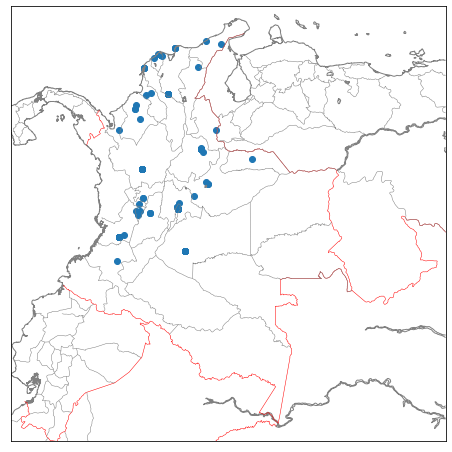

In [45]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=4, lon_0=-72,
            width=2E6, height=2E6)
#m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='red')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True)
